<a href="https://colab.research.google.com/github/ThiPtit/Classification/blob/master/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/Thi/FPT.csv')
df

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,FPT,12/25/2018 9:15,30.89,30.89,30.89,30.89,35410,0
1,FPT,12/25/2018 9:16,30.81,30.81,30.81,30.81,190,0
2,FPT,12/25/2018 9:17,30.74,30.81,30.74,30.74,1120,0
3,FPT,12/25/2018 9:18,30.74,30.74,30.74,30.74,2120,0
4,FPT,12/25/2018 9:19,30.74,30.74,30.74,30.74,22500,0
...,...,...,...,...,...,...,...,...
97401,FPT,12/22/2020 14:24,58.20,58.20,58.20,58.20,27470,0
97402,FPT,12/22/2020 14:25,58.20,58.20,58.20,58.20,14820,0
97403,FPT,12/22/2020 14:26,58.20,58.20,58.20,58.20,500,0
97404,FPT,12/22/2020 14:29,58.10,58.10,58.10,58.10,2500,0


In [29]:
df = df[['Date/Time', 'Close']]
df

,Date/Time,Close
0,12/25/2018 9:15,30.89
1,12/25/2018 9:16,30.81
2,12/25/2018 9:17,30.74
3,12/25/2018 9:18,30.74
4,12/25/2018 9:19,30.74
...,...,...
97401,12/22/2020 14:24,58.20
97402,12/22/2020 14:25,58.20
97403,12/22/2020 14:26,58.20
97404,12/22/2020 14:29,58.10


In [30]:
import datetime

def str_to_datetime(x):
  return datetime.datetime.strptime(x, '%m/%d/%Y %H:%M')

In [31]:
df['Date/Time'] = df['Date/Time'].apply(str_to_datetime)
df['Date/Time']

<ipython-input-31-0e6549cbcb48>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date/Time'] = df['Date/Time'].apply(str_to_datetime)


0       2018-12-25 09:15:00
1       2018-12-25 09:16:00
2       2018-12-25 09:17:00
3       2018-12-25 09:18:00
4       2018-12-25 09:19:00
                ...        
97401   2020-12-22 14:24:00
97402   2020-12-22 14:25:00
97403   2020-12-22 14:26:00
97404   2020-12-22 14:29:00
97405   2020-12-22 14:46:00
Name: Date/Time, Length: 97406, dtype: datetime64[ns]

In [32]:
df.index = df.pop('Date/Time')
df

,Close
Date/Time,
2018-12-25 09:15:00,30.89
2018-12-25 09:16:00,30.81
2018-12-25 09:17:00,30.74
2018-12-25 09:18:00,30.74
2018-12-25 09:19:00,30.74
...,...
2020-12-22 14:24:00,58.20
2020-12-22 14:25:00,58.20
2020-12-22 14:26:00,58.20


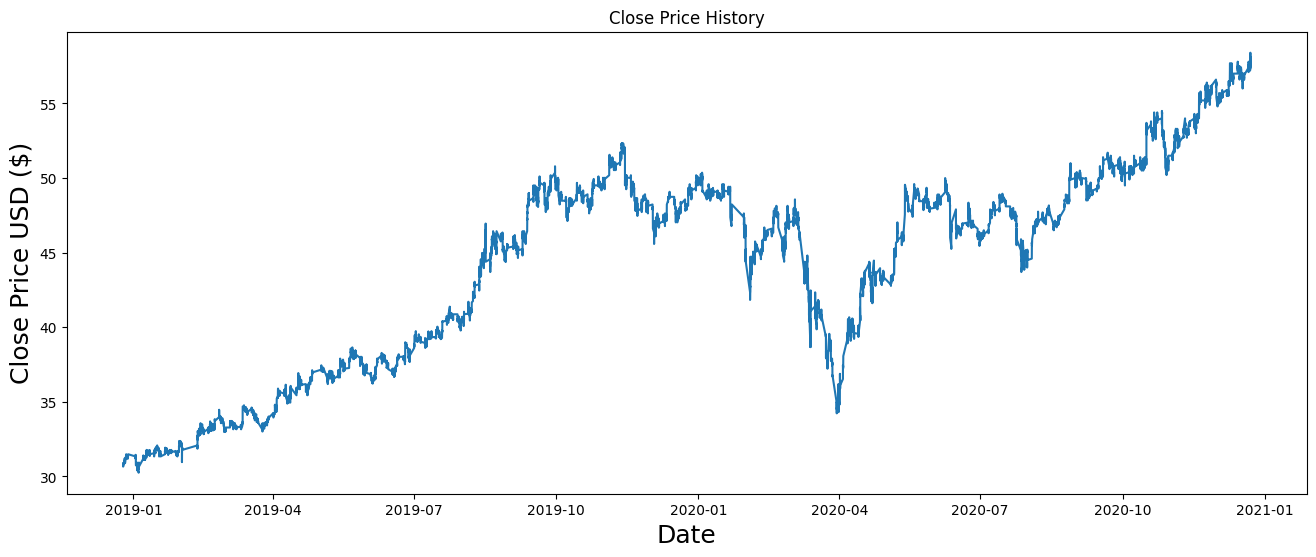

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [34]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil(len(dataset) * 0.8))

training_data_len

77925

In [35]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02273535],
       [0.01989343],
       [0.01740675],
       ...,
       [0.9928952 ],
       [0.98934281],
       [0.98934281]])

In [36]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()

x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
#x_train.shape


[array([0.02273535, 0.01989343, 0.01740675, 0.01740675, 0.01740675,
       0.01740675, 0.01456483, 0.03055062, 0.03339254, 0.03339254,
       0.03197158, 0.03055062, 0.03055062, 0.03055062, 0.03339254,
       0.03339254, 0.03055062, 0.03445826, 0.03445826, 0.02806394,
       0.02806394, 0.02522202, 0.02522202, 0.02522202, 0.02522202,
       0.02273535, 0.02273535, 0.02522202, 0.02273535, 0.02273535,
       0.02522202, 0.02522202, 0.02806394, 0.03339254, 0.03055062,
       0.03197158, 0.03197158, 0.03055062, 0.03055062, 0.03055062,
       0.03055062, 0.03339254, 0.03339254, 0.03339254, 0.03055062,
       0.03055062, 0.03055062, 0.03055062, 0.03055062, 0.03197158,
       0.03197158, 0.03055062, 0.03197158, 0.03055062, 0.03197158,
       0.03055062, 0.03055062, 0.03055062, 0.03055062, 0.03055062])]
[0.03197158081705154]



In [37]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

77865/77865 [==============================] - 4153s 53ms/step - loss: 6.4285e-05


In [42]:
# Create the testing data set
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

609/609 [==============================] - 26s 43ms/step


0.17900709170827514

<ipython-input-44-0cdd5e68a3a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


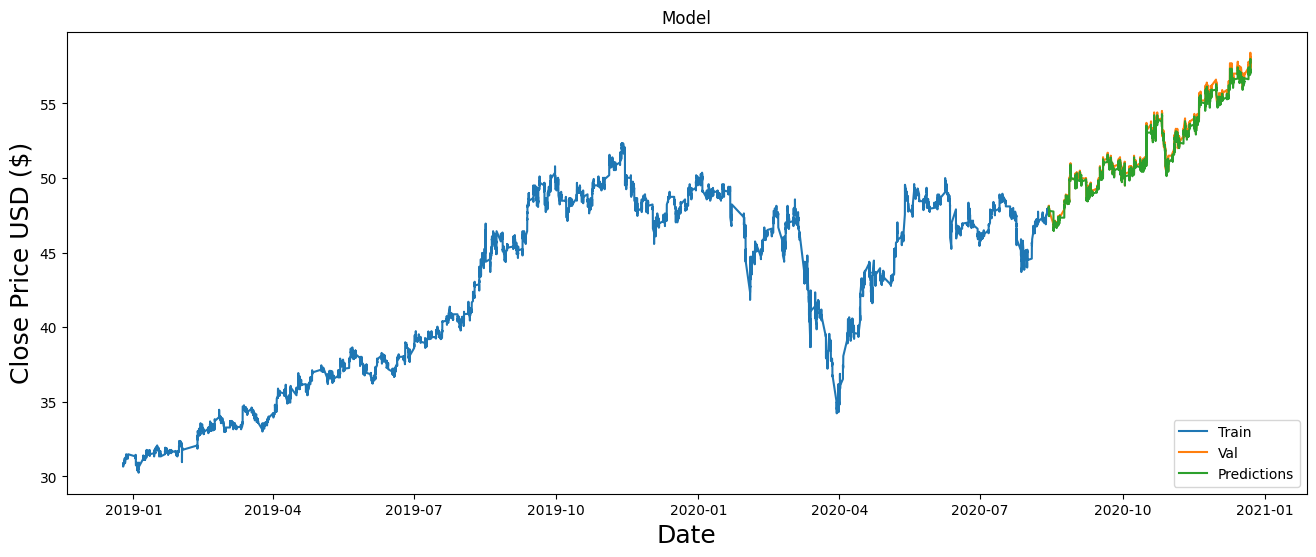

In [44]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [45]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date/Time,,
2020-08-14 09:34:00,48.10,48.021000
2020-08-14 09:35:00,48.10,48.038601
2020-08-14 09:36:00,48.10,48.043232
2020-08-14 09:37:00,48.15,48.044006
2020-08-14 09:38:00,48.15,48.083164
...,...,...
2020-12-22 14:24:00,58.20,57.782467
2020-12-22 14:25:00,58.20,57.795700
2020-12-22 14:26:00,58.20,57.803326


In [51]:
#Test with VIC data
df1 = pd.read_csv('/content/drive/MyDrive/Thi/VIC.csv')
df1

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,VIC,10/17/2018 9:39,98.5,98.5,98.5,98.5,390,0
1,VIC,10/17/2018 9:40,98.5,98.5,98.5,98.5,760,0
2,VIC,10/17/2018 9:41,98.6,98.6,98.6,98.6,2060,0
3,VIC,10/17/2018 9:42,98.6,98.6,98.6,98.6,5540,0
4,VIC,10/17/2018 9:43,98.6,98.7,98.6,98.7,760,0
...,...,...,...,...,...,...,...,...
101261,VIC,12/22/2020 14:22,105.8,105.8,105.7,105.7,1870,0
101262,VIC,12/22/2020 14:23,105.7,105.7,105.7,105.7,2510,0
101263,VIC,12/22/2020 14:24,105.7,105.7,105.7,105.7,3620,0
101264,VIC,12/22/2020 14:25,105.7,105.7,105.7,105.7,100,0


In [52]:
df1 = df1[['Date/Time', 'Close']]
df1

,Date/Time,Close
0,10/17/2018 9:39,98.5
1,10/17/2018 9:40,98.5
2,10/17/2018 9:41,98.6
3,10/17/2018 9:42,98.6
4,10/17/2018 9:43,98.7
...,...,...
101261,12/22/2020 14:22,105.7
101262,12/22/2020 14:23,105.7
101263,12/22/2020 14:24,105.7
101264,12/22/2020 14:25,105.7


In [53]:
df1['Date/Time'] = df1['Date/Time'].apply(str_to_datetime)
df1['Date/Time']

<ipython-input-53-5089f95cb558>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Date/Time'] = df1['Date/Time'].apply(str_to_datetime)


0        2018-10-17 09:39:00
1        2018-10-17 09:40:00
2        2018-10-17 09:41:00
3        2018-10-17 09:42:00
4        2018-10-17 09:43:00
                 ...        
101261   2020-12-22 14:22:00
101262   2020-12-22 14:23:00
101263   2020-12-22 14:24:00
101264   2020-12-22 14:25:00
101265   2020-12-22 14:46:00
Name: Date/Time, Length: 101266, dtype: datetime64[ns]

In [54]:
df1.index = df1.pop('Date/Time')
df1

,Close
Date/Time,
2018-10-17 09:39:00,98.5
2018-10-17 09:40:00,98.5
2018-10-17 09:41:00,98.6
2018-10-17 09:42:00,98.6
2018-10-17 09:43:00,98.7
...,...
2020-12-22 14:22:00,105.7
2020-12-22 14:23:00,105.7
2020-12-22 14:24:00,105.7


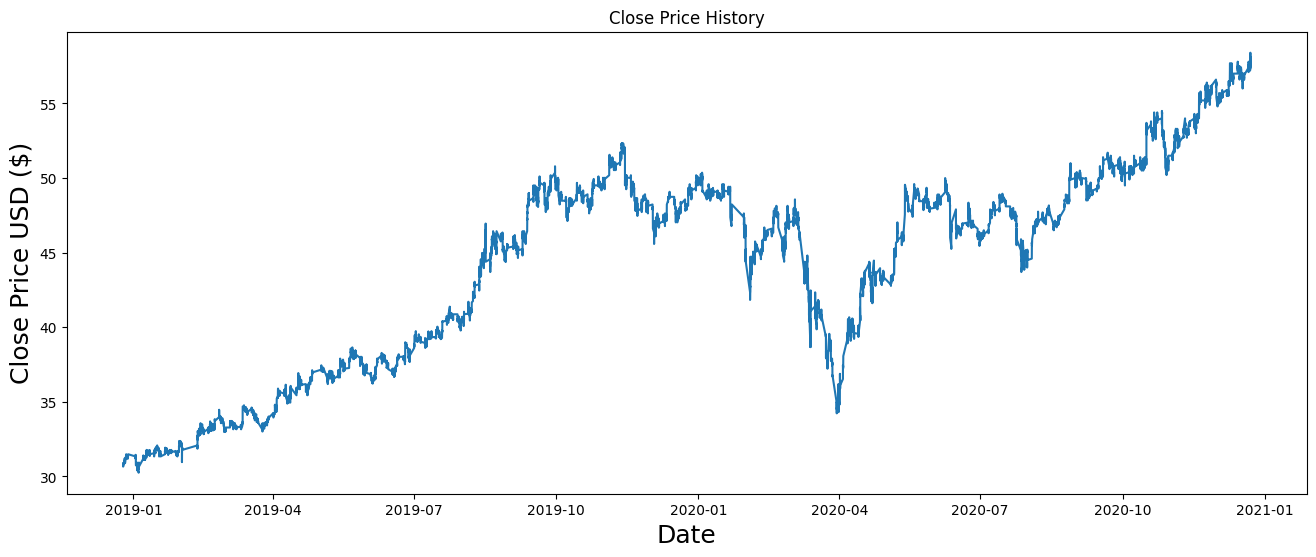

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [56]:
# Create a new dataframe with only the 'Close column
data = df1.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
testing_data_len = int(np.ceil(len(dataset)))

testing_data_len

101266

In [65]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.52136752],
       [0.52136752],
       [0.52307692],
       ...,
       [0.64444444],
       [0.64444444],
       [0.64444444]])

In [70]:
# Create the testing data set
test_data_1 = scaled_data[: , :]
# Create the data sets x_test and y_test
x_test_1 = []
y_test_1 = dataset[60:, :]
for i in range(60, len(test_data_1)):
    x_test_1.append(test_data_1[i-60:i, 0])

# Convert the data to a numpy array
x_test_1 = np.array(x_test_1)

# Reshape the data
x_test_1 = np.reshape(x_test_1, (x_test_1.shape[0], x_test_1.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test_1)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test_1) ** 2)))
rmse

3163/3163 [==============================] - 137s 43ms/step


0.3200484838950643

<ipython-input-72-3ea39663145c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


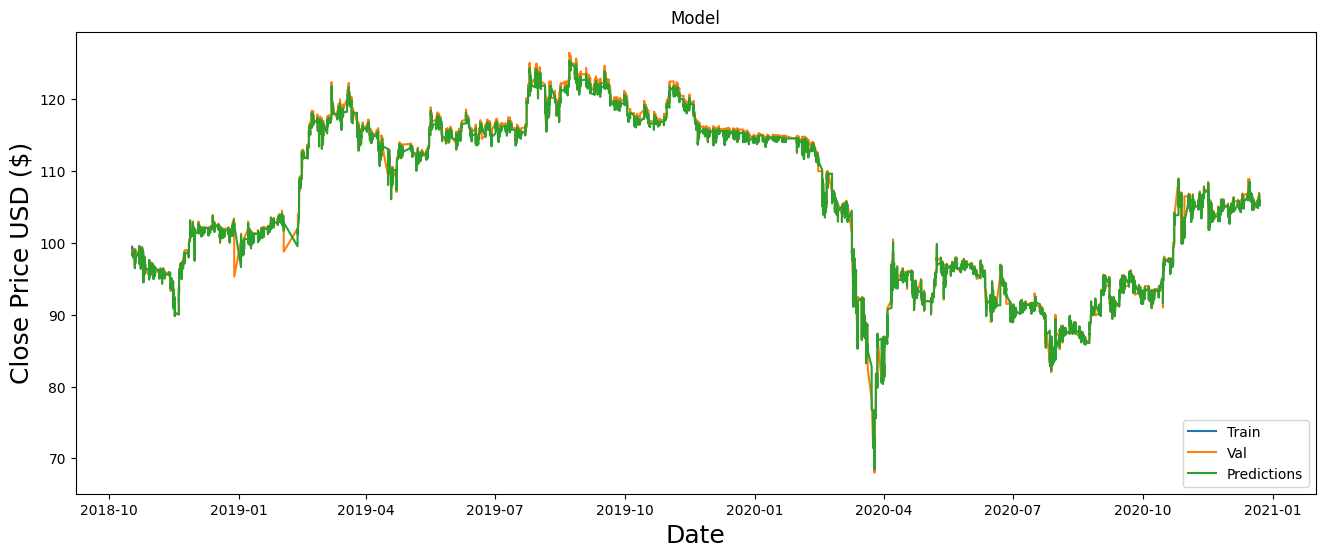

In [72]:
valid = data[60:]  # Create a copy of the validation set with the length of predictions

# Add the predictions to the valid set
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'], label='Train')
plt.plot(valid['Close'], label='Val')
plt.plot(valid['Predictions'], label='Predictions')
plt.legend(loc='lower right')
plt.show()

In [73]:
valid


,Close,Predictions
Date/Time,,
2018-10-17 10:49:00,98.7,98.587418
2018-10-17 10:50:00,98.7,98.606400
2018-10-17 10:53:00,98.6,98.610161
2018-10-17 10:54:00,98.5,98.529060
2018-10-17 10:55:00,98.5,98.429176
...,...,...
2020-12-22 14:22:00,105.7,105.667336
2020-12-22 14:23:00,105.7,105.589691
2020-12-22 14:24:00,105.7,105.572998
